# Exploratory Data Analysis on Amazon Dataset

Conduct EDA on an Amazon Product Dataset to examine the relationship between variables and reviews and ratings on products.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import datetime as dt

#Show plots in line
%matplotlib inline

In [30]:
#Suppress warnings import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [31]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [32]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


Data Cleanup

In [33]:
df.count()

id                     28332
dateAdded              28332
dateUpdated            28332
name                   28332
asins                  28332
brand                  28332
categories             28332
primaryCategories      28332
imageURLs              28332
keys                   28332
manufacturer           28332
manufacturerNumber     28332
reviews.date           28332
reviews.dateSeen       28332
reviews.didPurchase        9
reviews.doRecommend    16086
reviews.id                41
reviews.numHelpful     16115
reviews.rating         28332
reviews.sourceURLs     28332
reviews.text           28332
reviews.title          28332
reviews.username       28332
sourceURLs             28332
dtype: int64

It seems that there are a lot of missing values for the review.didPurchase and the reviews.id columns. It is best to just remove those columns as they won't serve a significant purpose for EDA.

In [34]:
df = df.drop('reviews.id', axis = 1)
df = df.drop('reviews.didPurchase', axis = 1)

In [35]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs'],
      dtype='object')

Converting all the date strings to datetime objects for the purpose of easier computation in the future.

In [36]:
#convert all dates to datetime objects
df.head()
df['dateAdded'] = pd.to_datetime(df['dateAdded'])
df['dateUpdated'] = pd.to_datetime(df['dateUpdated'])
df['reviews.date'] = pd.to_datetime(df['reviews.date'])
#review.dateSeen has multiple dates in each entry, however the column is useless


In [37]:
df['dateAdded'].dtype,df['dateUpdated'].dtype,df['reviews.date'].dtype

(datetime64[ns, UTC], datetime64[ns, UTC], datetime64[ns, UTC])

In [38]:
#The reviews.dateSeen columnn is unnecessary information because it
#information when the review was seen by Datafini, the datacollectors
df = df.drop('reviews.dateSeen', axis = 1)

In [39]:
df.dtypes

id                                  object
dateAdded              datetime64[ns, UTC]
dateUpdated            datetime64[ns, UTC]
name                                object
asins                               object
brand                               object
categories                          object
primaryCategories                   object
imageURLs                           object
keys                                object
manufacturer                        object
manufacturerNumber                  object
reviews.date           datetime64[ns, UTC]
reviews.doRecommend                 object
reviews.numHelpful                 float64
reviews.rating                       int64
reviews.sourceURLs                  object
reviews.text                        object
reviews.title                       object
reviews.username                    object
sourceURLs                          object
dtype: object

I've included a simple barplot to get a general idea of how the review ratings are distributed. It seems as there are a high number of 5 star reviews and a moderate amount of 4 star reviews indicating that people are generally satisfied with their purchase. There are a larger number of 1 star reviews than 2 star reviews.

Text(0.5, 1.0, 'Amazon Product Review Ratings')

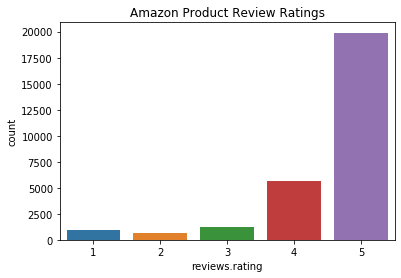

In [40]:
sns.countplot(data = df,x = 'reviews.rating')
plt.title('Amazon Product Review Ratings')

We're checking out the most reviewed primary categories for products in this dataset. Most of the reviews are made in products that are electronics and after that, health and beauty. Electronics are the most popular category when it comes to Amazon shopping and reviews.

In [41]:
df.primaryCategories.value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Electronics,Furniture              2
Home & Garden                      2
Name: primaryCategories, dtype: int64

Now, we are looking at the most reviewed products based on their product ID and from looking at the top 5 products, it seems as batteries are the most reviewed products followed by the Kindle Fire Tablet.

In [42]:
df.id.value_counts()

AVpgNzjwLJeJML43Kpxn    8343
AVpe7xlELJeJML43ypLz    3728
AVqkIhxunnc1JgDc3kg_    2443
AVqVGWQDv8e3D1O-ldFr    2370
AVpfw2hvilAPnD_xh0rH    1676
                        ... 
AVpe5Q3sLJeJML43xt5X       1
AVpiZQ8r1cnluZ0-M3MN       1
AVzvV7FHglJLPUi8GzhD       1
AVzoFq6UvKc47QAVe9NB       1
AWK8z0pOIwln0LfXlSxH       1
Name: id, Length: 65, dtype: int64

In [43]:
df[df['id'] == 'AVpgNzjwLJeJML43Kpxn'].head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,manufacturerNumber,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25 09:08:16+00:00,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,HL-002619,2017-03-02 00:00:00+00:00,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25 09:08:16+00:00,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,HL-002619,2016-08-31 00:00:00+00:00,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25 09:08:16+00:00,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,HL-002619,2016-12-06 00:00:00+00:00,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25 09:08:16+00:00,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,HL-002619,2016-03-28 00:00:00+00:00,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25 09:08:16+00:00,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,HL-002619,2017-04-22 00:00:00+00:00,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [44]:
df[df['id'] == 'AVpe7xlELJeJML43ypLz'].head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,manufacturerNumber,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
8358,AVpe7xlELJeJML43ypLz,2015-12-03 01:23:41+00:00,2019-04-24 02:17:42+00:00,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,amazonbasicsaaperformancealkalinebatteries48co...,...,LR6G0748FFPAB-US,2016-08-31 00:00:00+00:00,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106411,ht..."
8359,AVpe7xlELJeJML43ypLz,2015-12-03 01:23:41+00:00,2019-04-24 02:17:42+00:00,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,amazonbasicsaaperformancealkalinebatteries48co...,...,LR6G0748FFPAB-US,2017-04-11 00:00:00+00:00,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,Doesn't seem to last as long in some devices a...,... as long in some devices as other brands bu...,ByShawn M,"https://www.barcodable.com/upc/841710106411,ht..."
8360,AVpe7xlELJeJML43ypLz,2015-12-03 01:23:41+00:00,2019-04-24 02:17:42+00:00,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,amazonbasicsaaperformancealkalinebatteries48co...,...,LR6G0748FFPAB-US,2017-04-17 00:00:00+00:00,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,ive not had any problame with these batteries ...,... batteries have ordered them in the past be...,ByAmazon Customer,"https://www.barcodable.com/upc/841710106411,ht..."
8361,AVpe7xlELJeJML43ypLz,2015-12-03 01:23:41+00:00,2019-04-24 02:17:42+00:00,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,amazonbasicsaaperformancealkalinebatteries48co...,...,LR6G0748FFPAB-US,2017-04-16 00:00:00+00:00,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well if you are looking for cheap non-recharge...,... batteries that last quite a while then the...,ByLynn Pendegrass,"https://www.barcodable.com/upc/841710106411,ht..."
8362,AVpe7xlELJeJML43ypLz,2015-12-03 01:23:41+00:00,2019-04-24 02:17:42+00:00,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,amazonbasicsaaperformancealkalinebatteries48co...,...,LR6G0748FFPAB-US,2017-04-06 00:00:00+00:00,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,The battery life is much poorer compared to na...,... battery life is much poorer compared to na...,ByAmazon Customer,"https://www.barcodable.com/upc/841710106411,ht..."


In [45]:
df[df['id'] == 'AVqkIhxunnc1JgDc3kg_'].head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,manufacturerNumber,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
25889,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23 02:49:38+00:00,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,53-004485,2016-12-24 00:00:00+00:00,True,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,While there are some apps that are missing due...,. Nice hand sized tablet,greg,http://reviews.bestbuy.com/3545/5620410/review...
25890,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23 02:49:38+00:00,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,53-004485,2016-12-14 00:00:00+00:00,True,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,I bought one last year for one cousin and had ...,2nd purchase,VanStriker,http://reviews.bestbuy.com/3545/5620410/review...
25891,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23 02:49:38+00:00,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,53-004485,2017-01-18 00:00:00+00:00,True,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,I will try again for the 3rd time with my new ...,3rd time is the charm,HotTNMomma,http://reviews.bestbuy.com/3545/5620410/review...
25892,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23 02:49:38+00:00,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,53-004485,2017-01-17 00:00:00+00:00,True,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,"bought this for my father, who never did much ...",5 star service,packersfan,http://reviews.bestbuy.com/3545/5620410/review...
25893,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23 02:49:38+00:00,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,53-004485,2017-03-21 00:00:00+00:00,True,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,This was a request from our 7 yr old granddaug...,7 year old granddaughter loves it,Intheknow,http://reviews.bestbuy.com/3545/5620410/review...


In [46]:
df[df['id'] == 'AVqVGWQDv8e3D1O-ldFr'].head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,manufacturerNumber,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
13386,AVqVGWQDv8e3D1O-ldFr,2017-03-03 16:55:53+00:00,2019-03-09 07:13:43+00:00,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,...,53-004484,2016-12-24 00:00:00+00:00,True,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,While there are some apps that are missing due...,. Nice hand sized tablet,greg,http://reviews.bestbuy.com/3545/5620406/review...
13388,AVqVGWQDv8e3D1O-ldFr,2017-03-03 16:55:53+00:00,2019-03-09 07:13:43+00:00,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,...,53-004484,2016-12-14 00:00:00+00:00,True,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I bought one last year for one cousin and had ...,2nd purchase,VanStriker,http://reviews.bestbuy.com/3545/5620406/review...
13392,AVqVGWQDv8e3D1O-ldFr,2017-03-03 16:55:53+00:00,2019-03-09 07:13:43+00:00,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,...,53-004484,2017-01-18 00:00:00+00:00,True,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I will try again for the 3rd time with my new ...,3rd time is the charm,HotTNMomma,http://reviews.bestbuy.com/3545/5620406/review...
13393,AVqVGWQDv8e3D1O-ldFr,2017-03-03 16:55:53+00:00,2019-03-09 07:13:43+00:00,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,...,53-004484,2017-01-17 00:00:00+00:00,True,0.0,5,http://reviews.bestbuy.com/3545/5538501/review...,"bought this for my father, who never did much ...",5 star service,packersfan,http://reviews.bestbuy.com/3545/5620406/review...
13394,AVqVGWQDv8e3D1O-ldFr,2017-03-03 16:55:53+00:00,2019-03-09 07:13:43+00:00,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,...,53-004484,2017-03-21 00:00:00+00:00,True,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,This was a request from our 7 yr old granddaug...,7 year old granddaughter loves it,Intheknow,http://reviews.bestbuy.com/3545/5620406/review...


In [47]:
df[df['id'] == 'AVpfw2hvilAPnD_xh0rH'].head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,manufacturerNumber,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
13387,AVpfw2hvilAPnD_xh0rH,2017-01-11 06:58:33+00:00,2019-03-09 07:13:43+00:00,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y226XO,Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...","Toys & Games,Electronics",https://pisces.bbystatic.com/image2/BestBuy_US...,"amazon/53004754,841667103372,0841667103372,7in...",...,53-004754,2017-03-04 00:00:00+00:00,True,0.0,5,http://reviews.bestbuy.com/3545/5026100/review...,great tablet for kids when traveling. my grand...,2 year old loves it,betty,http://www.toysrus.com/product/index.jsp?produ...
13389,AVpfw2hvilAPnD_xh0rH,2017-01-11 06:58:33+00:00,2019-03-09 07:13:43+00:00,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y226XO,Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...","Toys & Games,Electronics",https://pisces.bbystatic.com/image2/BestBuy_US...,"amazon/53004754,841667103372,0841667103372,7in...",...,53-004754,2016-12-16 00:00:00+00:00,True,0.0,4,http://reviews.bestbuy.com/3545/5026100/review...,Bought this for my 2 yr old daughter. She was ...,2yr old approved,Mike,http://www.toysrus.com/product/index.jsp?produ...
13390,AVpfw2hvilAPnD_xh0rH,2017-01-11 06:58:33+00:00,2019-03-09 07:13:43+00:00,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y226XO,Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...","Toys & Games,Electronics",https://pisces.bbystatic.com/image2/BestBuy_US...,"amazon/53004754,841667103372,0841667103372,7in...",...,53-004754,2017-01-07 00:00:00+00:00,True,0.0,5,http://reviews.bestbuy.com/3545/5026100/review...,Kindle products are fantastic. I've used a kin...,3 year old granddaughter loves it!!! Easy for her,Jeanie,http://www.toysrus.com/product/index.jsp?produ...
13391,AVpfw2hvilAPnD_xh0rH,2017-01-11 06:58:33+00:00,2019-03-09 07:13:43+00:00,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y226XO,Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...","Toys & Games,Electronics",https://pisces.bbystatic.com/image2/BestBuy_US...,"amazon/53004754,841667103372,0841667103372,7in...",...,53-004754,2017-03-15 00:00:00+00:00,True,0.0,4,http://reviews.bestbuy.com/3545/5026100/review...,Best buy ever for my 3 year old. Only purchase...,3 year old's Heaven,kidslove,http://www.toysrus.com/product/index.jsp?produ...
13396,AVpfw2hvilAPnD_xh0rH,2017-01-11 06:58:33+00:00,2019-03-09 07:13:43+00:00,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y226XO,Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...","Toys & Games,Electronics",https://pisces.bbystatic.com/image2/BestBuy_US...,"amazon/53004754,841667103372,0841667103372,7in...",...,53-004754,2016-12-26 00:00:00+00:00,True,0.0,5,http://reviews.bestbuy.com/3545/5026100/review...,My little girl loves her Kindle. I'm so happy ...,9 year old loves,Yve0904,http://www.toysrus.com/product/index.jsp?produ...


We're examining the mean ratings of products in each department and it seems that electronics have a generally higher rating than health and beauty products. It would seem so because electronics are more reliable and functional than health and beauty products and people would rate electronics based only their functionality where as there are a lot of aspects of quality when it comes to health and beauty products as well as office supplies and toys and games.

In [48]:
df.groupby(['primaryCategories']).mean()['reviews.rating']

primaryCategories
Animals & Pet Supplies         4.500000
Electronics                    4.563987
Electronics,Furniture          5.000000
Electronics,Media              4.664865
Health & Beauty                4.449756
Home & Garden                  4.500000
Office Supplies                5.000000
Office Supplies,Electronics    4.554404
Toys & Games,Electronics       4.531026
Name: reviews.rating, dtype: float64

It is important to examine the number of entries in the 'Electronics,Furniture' category as it has a perfect 5 mean rating. Same goes with 'Office Supplies'.

In [49]:
df[df['primaryCategories']== 'Electronics,Furniture']

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,manufacturerNumber,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
13380,AWMjN1SSIwln0LfXmWs7,2018-05-02 14:06:20+00:00,2019-03-09 07:13:48+00:00,All-new Echo (2nd Generation) with improved so...,B0752151W6,Amazon,"Amazon Echo,Smart Speakers,Electronics,Digital...","Electronics,Furniture",https://i.ebayimg.com/thumbs/images/g/tOMAAOSw...,allnewecho2ndgenerationwithimprovedsoundpowere...,...,53-007169,2018-01-17 00:00:00+00:00,True,0.0,5,https://reviews.bestbuy.com/3545/6130002/revie...,After researching The Amazon Echo and the Goog...,Great speaker and user friendly,Ladybug,https://www.newegg.com/Product/Product.aspx%25...
13384,AWMjN1SSIwln0LfXmWs7,2018-05-02 14:06:20+00:00,2019-03-09 07:13:48+00:00,All-new Echo (2nd Generation) with improved so...,B0752151W6,Amazon,"Amazon Echo,Smart Speakers,Electronics,Digital...","Electronics,Furniture",https://i.ebayimg.com/thumbs/images/g/tOMAAOSw...,allnewecho2ndgenerationwithimprovedsoundpowere...,...,53-007169,2018-03-21 00:00:00+00:00,True,0.0,5,https://reviews.bestbuy.com/3545/6130002/revie...,I like using Amazon Echo for playing calming m...,Smart Device,raquelladonna,https://www.newegg.com/Product/Product.aspx%25...


In [50]:
df[df['primaryCategories']== 'Office Supplies']

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,manufacturerNumber,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
12156,AVpfhcniLJeJML43-t4G,2015-10-30 10:58:06+00:00,2019-04-22 10:21:26+00:00,Expanding Accordion File Folder Plastic Portab...,"B0002LCUZK,B010CEC6MI,B01B25NN64",Amazonbasics,"Office,File Jackets & File Pockets,File Folder...",Office Supplies,https://i.ebayimg.com/images/g/qAwAAOSwptJab16...,expandingaccordionfilefolderplasticportabledoc...,...,PBH-2557,2017-03-02 00:00:00+00:00,NaN,NaN,5,http://www.ebay.com/itm/File-Pocket-Expanding-...,This folder also expands on the bottom. Will a...,Bottom expands as well,happypersonohyeh,http://www.ebay.com/itm/Expanding-File-Tabs-Fo...
12157,AVpfhcniLJeJML43-t4G,2015-10-30 10:58:06+00:00,2019-04-22 10:21:26+00:00,Expanding Accordion File Folder Plastic Portab...,"B0002LCUZK,B010CEC6MI,B01B25NN64",Amazonbasics,"Office,File Jackets & File Pockets,File Folder...",Office Supplies,https://i.ebayimg.com/images/g/qAwAAOSwptJab16...,expandingaccordionfilefolderplasticportabledoc...,...,PBH-2557,2019-03-25 00:00:00+00:00,NaN,NaN,5,https://www.ebay.com/itm/Expanding-Accordion-F...,Exactly what I needed.,Folder,99kurama99,http://www.ebay.com/itm/Expanding-File-Tabs-Fo...
12158,AVpfhcniLJeJML43-t4G,2015-10-30 10:58:06+00:00,2019-04-22 10:21:26+00:00,Expanding Accordion File Folder Plastic Portab...,"B0002LCUZK,B010CEC6MI,B01B25NN64",Amazonbasics,"Office,File Jackets & File Pockets,File Folder...",Office Supplies,https://i.ebayimg.com/images/g/qAwAAOSwptJab16...,expandingaccordionfilefolderplasticportabledoc...,...,PBH-2557,2017-11-09 00:00:00+00:00,NaN,NaN,5,https://www.ebay.com/itm/Expanding-File-Tabs-F...,Nice product. Will work perfectly for my proje...,Folder,juleekae,http://www.ebay.com/itm/Expanding-File-Tabs-Fo...
12159,AVpfhcniLJeJML43-t4G,2015-10-30 10:58:06+00:00,2019-04-22 10:21:26+00:00,Expanding Accordion File Folder Plastic Portab...,"B0002LCUZK,B010CEC6MI,B01B25NN64",Amazonbasics,"Office,File Jackets & File Pockets,File Folder...",Office Supplies,https://i.ebayimg.com/images/g/qAwAAOSwptJab16...,expandingaccordionfilefolderplasticportabledoc...,...,PBH-2557,2017-03-27 00:00:00+00:00,NaN,NaN,5,http://www.ebay.com/itm/File-Pocket-Expanding-...,A useful folder organizer with good quality.,Good purchase,ml2shop,http://www.ebay.com/itm/Expanding-File-Tabs-Fo...
12160,AVpfhcniLJeJML43-t4G,2015-10-30 10:58:06+00:00,2019-04-22 10:21:26+00:00,Expanding Accordion File Folder Plastic Portab...,"B0002LCUZK,B010CEC6MI,B01B25NN64",Amazonbasics,"Office,File Jackets & File Pockets,File Folder...",Office Supplies,https://i.ebayimg.com/images/g/qAwAAOSwptJab16...,expandingaccordionfilefolderplasticportabledoc...,...,PBH-2557,2017-01-12 00:00:00+00:00,NaN,NaN,5,http://www.ebay.com/itm/File-Pocket-Expanding-...,I love the portability of this expandable file...,Great product and cost,connieinla,http://www.ebay.com/itm/Expanding-File-Tabs-Fo...
12161,AVpfhcniLJeJML43-t4G,2015-10-30 10:58:06+00:00,2019-04-22 10:21:26+00:00,Expanding Accordion File Folder Plastic Portab...,"B0002LCUZK,B010CEC6MI,B01B25NN64",Amazonbasics,"Office,File Jackets & File Pockets,File Folder...",Office Supplies,https://i.ebayimg.com/images/g/qAwAAOSwptJab16...,expandingaccordionfilefolderplasticportabledoc...,...,PBH-2557,2018-06-12 00:00:00+00:00,NaN,NaN,5,https://www.ebay.com/urw/product-reviews/10014...,Exactly what I needed!!!!,Perfect!,lobo5981,http://www.ebay.com/itm/Expanding-File-Tabs-Fo...
12162,AVpfhcniLJeJML43-t4G,2015-10-30 10:58:06+00:00,2019-04-22 10:21:26+00:00,Expanding Accordion File Folder Plastic Portab...,"B0002LCUZK,B010CEC6MI,B01B25NN64",Amazonbasics,"Office,File Jackets & File Pockets,File Folder...",Office Supplies,https://i.ebayimg.com/images/g/qAwAAOSwptJab16...,expandingaccordionfilefolderplasticportabledoc...,...,PBH-2557,2017-08-16 00:00:00+00:00,NaN,NaN,5

Now we are seeing how the length of the review text correlates with the review rating (out of 5 stars).

In [51]:
df['lengthofreview'] = [len(i) for i in df['reviews.text']]

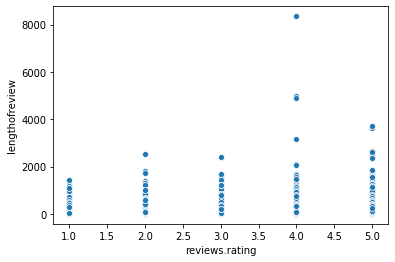

In [52]:
sns.scatterplot(x = 'reviews.rating', y = 'lengthofreview', data = df)

Generally longer text reviews correlates to higher ratings judging off of the scatterplot. There are large outliers for 4 star ratings and it is important to investigate those outliers.

We are going to investigate the correlation between difference between the date of the product being added to the database and the date the product review was posted with the overall rating that the user gave the product.

In [53]:
df['reviewsminusdateadd'] = df['reviews.date'] - df['dateAdded']
days = df['reviewsminusdateadd'].astype('timedelta64[D]')


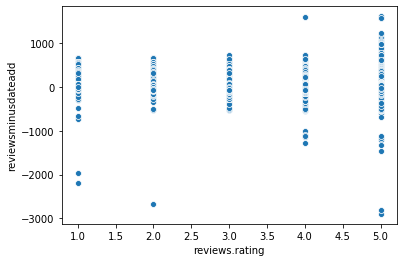

In [54]:
sns.scatterplot(df['reviews.rating'],days)


If there is a higher difference between the date the product was added to the database and the date the review was posted, the review will generally yield a greater rating as can be seen from the plot. This can be attributed to the reliability of the product. The 'reviewsminusdateadd' column gives a rough idea of how long a product has been on the market and available for sale and products with longer lifespans on the market correlates to higher reviews given by users. 